# Data Preparation and Feature Creation

# Arithmetic Operations

In [4]:
import pandas as pd
import numpy as np

In [5]:
titanic = pd.read_csv("titanic.csv")

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
titanic.age.fillna(titanic.age.mean(), inplace= True)

In [9]:
titanic.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.000000,1,0,7.2500,S,NaN
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,NaN
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,NaN
5,0,3,male,29.699118,0,0,8.4583,Q,NaN
6,0,1,male,54.000000,0,0,51.8625,S,E
7,0,3,male,2.000000,3,1,21.0750,S,NaN
8,1,3,female,27.000000,0,2,11.1333,S,NaN
9,1,2,female,14.000000,1,0,30.0708,C,NaN


# Add/Sub/Mul/Div of Columns

In [10]:
titanic.sibsp + titanic.parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [11]:
titanic.sibsp.add(titanic.parch)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [12]:
titanic["no_relat"] = titanic.sibsp.add(titanic.parch)

In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [14]:
sales = pd.read_csv("sales.csv", index_col= 0)

In [15]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [16]:
sales.Mon.add(sales.Thu, fill_value = 0)

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [17]:
sales["perc_Bonus"] = [0.12,0.15,0.10,0.20]

In [18]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus
Steven,34,27,15,NaN,33,0.12
Mike,45,9,74,87.0,12,0.15
Andi,17,33,54,8.0,29,0.10
Paul,87,67,27,45.0,7,0.20


In [19]:
sales.Thu.mul(sales.perc_Bonus, fill_value = 0)

Steven     0.00
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [20]:
sales.iloc[:,:-1].sum(axis = 1).mul(sales.perc_Bonus)

Steven    13.08
Mike      34.05
Andi      14.10
Paul      46.60
dtype: float64

In [21]:
sales["bonus"] = sales.iloc[:,:-1].sum(axis = 1).mul(sales.perc_Bonus)

In [22]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


# Add/Sub/Mul/Div with Scaler Value

In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [24]:
titanic["YoB"] = titanic.age.sub(1912).mul(-1).round()

In [25]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB
0,0,3,male,22.000000,1,0,7.2500,S,NaN,1,1890.0
1,1,1,female,38.000000,1,0,71.2833,C,C,1,1874.0
2,1,3,female,26.000000,0,0,7.9250,S,NaN,0,1886.0
3,1,1,female,35.000000,1,0,53.1000,S,C,1,1877.0
4,0,3,male,35.000000,0,0,8.0500,S,NaN,0,1877.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,NaN,0,1885.0
887,1,1,female,19.000000,0,0,30.0000,S,B,0,1893.0
888,0,3,female,29.699118,1,2,23.4500,S,NaN,3,1882.0
889,1,1,male,26.000000,0,0,30.0000,C,C,0,1886.0


In [26]:
fx_rate = 1.1

In [27]:
titanic["EUR_fare"] = titanic.fare.div(fx_rate)

In [28]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB,EUR_fare
0,0,3,male,22.000000,1,0,7.2500,S,NaN,1,1890.0,6.590909
1,1,1,female,38.000000,1,0,71.2833,C,C,1,1874.0,64.803000
2,1,3,female,26.000000,0,0,7.9250,S,NaN,0,1886.0,7.204545
3,1,1,female,35.000000,1,0,53.1000,S,C,1,1877.0,48.272727
4,0,3,male,35.000000,0,0,8.0500,S,NaN,0,1877.0,7.318182
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,NaN,0,1885.0,11.818182
887,1,1,female,19.000000,0,0,30.0000,S,B,0,1893.0,27.272727
888,0,3,female,29.699118,1,2,23.4500,S,NaN,3,1882.0,21.318182
889,1,1,male,26.000000,0,0,30.0000,C,C,0,1886.0,27.272727


In [29]:
titanic.drop(columns= ["sibsp", "parch", "deck", "YoB", "EUR_fare"], inplace= True)

In [30]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,3,male,22.000000,7.2500,S,1
1,1,1,female,38.000000,71.2833,C,1
2,1,3,female,26.000000,7.9250,S,0
3,1,1,female,35.000000,53.1000,S,1
4,0,3,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0
887,1,1,female,19.000000,30.0000,S,0
888,0,3,female,29.699118,23.4500,S,3
889,1,1,male,26.000000,30.0000,C,0


In [31]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


In [32]:
fixed_costs = 5

In [33]:
sales.iloc[:,:-2].sub(fixed_costs,fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,29,22,10,-5.0,28
Mike,40,4,69,82.0,7
Andi,12,28,49,3.0,24
Paul,82,62,22,40.0,2


In [34]:
perc_bonus = 0.1

In [35]:
sales.iloc[:,:-2].mul(perc_bonus,fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,3.4,2.7,1.5,0.0,3.3
Mike,4.5,0.9,7.4,8.7,1.2
Andi,1.7,3.3,5.4,0.8,2.9
Paul,8.7,6.7,2.7,4.5,0.7


In [36]:
lot_size = 10
bonus_per_lot = 1.25

In [37]:
sales.iloc[:,:-2].floordiv(lot_size,fill_value = 0).mul(bonus_per_lot).sum(axis = 1)

Steven    11.25
Mike      25.00
Andi      13.75
Paul      25.00
dtype: float64

# Transformation / Mapping

In [38]:
summer = pd.read_csv("summer.csv")

In [39]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [40]:
sample = summer.sample(n = 7,random_state= 123).sort_values(by = "Year")

In [41]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [42]:
city_country = {"Paris":"France", "Mexico":"Mexico", "Montreal":"Canada", "Moscow":"Russia", "Barcelona":"Spain", "Athens": "Greece"}

In [43]:
city_country

{'Paris': 'France',
 'Mexico': 'Mexico',
 'Montreal': 'Canada',
 'Moscow': 'Russia',
 'Barcelona': 'Spain',
 'Athens': 'Greece'}

In [44]:
sample.City.map(city_country)

4196     France
11961    Mexico
11742    Mexico
13996    Canada
16229    Russia
19728     Spain
25901    Greece
Name: City, dtype: object

In [45]:
sample["Host_Country"] = sample.City.map(city_country)

In [46]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Host_Country
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze,France
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold,Mexico
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold,Mexico
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver,Canada
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze,Russia
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver,Spain
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze,Greece


In [47]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [48]:
mapper = {1:"First", 2:"Second", 3:"Third"}

In [49]:
titanic.pclass.map(mapper)

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: pclass, Length: 891, dtype: object

In [50]:
titanic.pclass = titanic.pclass.map(mapper)

In [51]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,Third,male,22.000000,7.2500,S,1
1,1,First,female,38.000000,71.2833,C,1
2,1,Third,female,26.000000,7.9250,S,0
3,1,First,female,35.000000,53.1000,S,1
4,0,Third,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0
887,1,First,female,19.000000,30.0000,S,0
888,0,Third,female,29.699118,23.4500,S,3
889,1,First,male,26.000000,30.0000,C,0


In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    object 
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   no_relat  891 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


# Condition Transformation

In [53]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,Third,male,22.000000,7.2500,S,1
1,1,First,female,38.000000,71.2833,C,1
2,1,Third,female,26.000000,7.9250,S,0
3,1,First,female,35.000000,53.1000,S,1
4,0,Third,male,35.000000,8.0500,S,0
5,0,Third,male,29.699118,8.4583,Q,0
6,0,First,male,54.000000,51.8625,S,0
7,0,Third,male,2.000000,21.0750,S,4
8,1,Third,female,27.000000,11.1333,S,2
9,1,Second,female,14.000000,30.0708,C,1


In [54]:
titanic.no_relat == 0

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: no_relat, Length: 891, dtype: bool

In [55]:
np.where(titanic.no_relat == 0, "Yes", "No")

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',

In [56]:
titanic["alone"] = pd.Series(np.where(titanic.no_relat == 0, "Yes", "No"))

In [57]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone
0,0,Third,male,22.0,7.2500,S,1,No
1,1,First,female,38.0,71.2833,C,1,No
2,1,Third,female,26.0,7.9250,S,0,Yes
3,1,First,female,35.0,53.1000,S,1,No
4,0,Third,male,35.0,8.0500,S,0,Yes


In [58]:
titanic["child"] = pd.Series(np.where(titanic.age < 18, "Yes", "No"))

In [59]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child
0,0,Third,male,22.000000,7.2500,S,1,No,No
1,1,First,female,38.000000,71.2833,C,1,No,No
2,1,Third,female,26.000000,7.9250,S,0,Yes,No
3,1,First,female,35.000000,53.1000,S,1,No,No
4,0,Third,male,35.000000,8.0500,S,0,Yes,No
...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No
887,1,First,female,19.000000,30.0000,S,0,Yes,No
888,0,Third,female,29.699118,23.4500,S,3,No,No
889,1,First,male,26.000000,30.0000,C,0,Yes,No


# Discretization and Binning with pd.cut() 

In [60]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child
0,0,Third,male,22.0,7.2500,S,1,No,No
1,1,First,female,38.0,71.2833,C,1,No,No
2,1,Third,female,26.0,7.9250,S,0,Yes,No
3,1,First,female,35.0,53.1000,S,1,No,No
4,0,Third,male,35.0,8.0500,S,0,Yes,No


In [61]:
age_bins = [0,10,18,30,55,100]

In [62]:
cats = pd.cut(titanic.age, age_bins, right = False)

In [63]:
cats

0      [18, 30)
1      [30, 55)
2      [18, 30)
3      [30, 55)
4      [30, 55)
         ...   
886    [18, 30)
887    [18, 30)
888    [18, 30)
889    [18, 30)
890    [30, 55)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, left]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [64]:
cats.value_counts()

age
[18, 30)     448
[30, 55)     288
[0, 10)       62
[10, 18)      51
[55, 100)     42
Name: count, dtype: int64

In [65]:
titanic["age_cat"] = cats

In [66]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,"[18, 30)"
1,1,First,female,38.000000,71.2833,C,1,No,No,"[30, 55)"
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,"[18, 30)"
3,1,First,female,35.000000,53.1000,S,1,No,No,"[30, 55)"
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,"[30, 55)"
...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,"[18, 30)"
887,1,First,female,19.000000,30.0000,S,0,Yes,No,"[18, 30)"
888,0,Third,female,29.699118,23.4500,S,3,No,No,"[18, 30)"
889,1,First,male,26.000000,30.0000,C,0,Yes,No,"[18, 30)"


In [67]:
titanic.groupby("age_cat").survived.mean()

age_cat
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.328125
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [68]:
group_names = ["child", "teenager", "young_adult", "adult", "elderly"]

In [69]:
pd.cut(titanic.age,age_bins, right = False, labels= group_names)

0      young_adult
1            adult
2      young_adult
3            adult
4            adult
          ...     
886    young_adult
887    young_adult
888    young_adult
889    young_adult
890          adult
Name: age, Length: 891, dtype: category
Categories (5, object): ['child' < 'teenager' < 'young_adult' < 'adult' < 'elderly']

In [70]:
titanic.age_cat = pd.cut(titanic.age,age_bins, right = False, labels= group_names)

In [71]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult
1,1,First,female,38.0,71.2833,C,1,No,No,adult
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult
3,1,First,female,35.0,53.1000,S,1,No,No,adult
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult


In [72]:
titanic.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [73]:
pd.cut(titanic.fare,5,precision=0)

0      (-1.0, 102.0]
1      (-1.0, 102.0]
2      (-1.0, 102.0]
3      (-1.0, 102.0]
4      (-1.0, 102.0]
           ...      
886    (-1.0, 102.0]
887    (-1.0, 102.0]
888    (-1.0, 102.0]
889    (-1.0, 102.0]
890    (-1.0, 102.0]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-1.0, 102.0] < (102.0, 205.0] < (205.0, 307.0] < (307.0, 410.0] < (410.0, 512.0]]

In [74]:
titanic["fare_cat"] = pd.cut(titanic.fare,5,precision= 0)

In [75]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,"(-1.0, 102.0]"
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,"(-1.0, 102.0]"
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,"(-1.0, 102.0]"
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,"(-1.0, 102.0]"
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,"(-1.0, 102.0]"
5,0,Third,male,29.699118,8.4583,Q,0,Yes,No,young_adult,"(-1.0, 102.0]"
6,0,First,male,54.000000,51.8625,S,0,Yes,No,adult,"(-1.0, 102.0]"
7,0,Third,male,2.000000,21.0750,S,4,No,Yes,child,"(-1.0, 102.0]"
8,1,Third,female,27.000000,11.1333,S,2,No,No,young_adult,"(-1.0, 102.0]"
9,1,Second,female,14.000000,30.0708,C,1,No,Yes,teenager,"(-1.0, 102.0]"


In [76]:
titanic.fare_cat.value_counts()

fare_cat
(-1.0, 102.0]     838
(102.0, 205.0]     33
(205.0, 307.0]     17
(410.0, 512.0]      3
(307.0, 410.0]      0
Name: count, dtype: int64

# Discretization and Binning with pd.qcut()

In [77]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,"(-1.0, 102.0]"
1,1,First,female,38.0,71.2833,C,1,No,No,adult,"(-1.0, 102.0]"
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,"(-1.0, 102.0]"
3,1,First,female,35.0,53.1000,S,1,No,No,adult,"(-1.0, 102.0]"
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,"(-1.0, 102.0]"


In [80]:
pd.qcut(titanic.fare,5)

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [81]:
titanic["fare_cat"]= pd.qcut(titanic.fare,5)

In [82]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,"(-0.001, 7.854]"
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,"(39.688, 512.329]"
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,"(7.854, 10.5]"
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,"(39.688, 512.329]"
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,"(7.854, 10.5]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,"(10.5, 21.679]"
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,"(21.679, 39.688]"
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,"(21.679, 39.688]"
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,"(21.679, 39.688]"


In [84]:
titanic.fare_cat.value_counts()

fare_cat
(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: count, dtype: int64

In [86]:
titanic["fare_cat"]=pd.qcut(titanic.fare,[0,0.1,0.25,0.5,0.9,1], precision=0)

In [87]:
titanic.fare_cat.value_counts()

fare_cat
(14.5, 78.0]     357
(7.9, 14.5]      224
(7.6, 7.9]       131
(-0.1, 7.6]       92
(78.0, 512.3]     87
Name: count, dtype: int64

In [88]:
fare_lable = ["very cheap", "cheap", "moderate", "exp", "very_exp"]

In [89]:
titanic["fare_cat"]=pd.qcut(titanic.fare,[0,0.1,0.25,0.5,0.9,1], precision=0, labels = fare_lable)

In [90]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,very cheap
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,moderate
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,moderate
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,exp
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,exp
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,exp


In [93]:
titanic.groupby(["age_cat", "fare_cat"]).survived.mean().unstack()

fare_cat,very cheap,cheap,moderate,exp,very_exp
age_cat,,,,,
child,NaN,NaN,0.875000,0.568627,0.666667
teenager,0.333333,0.500000,0.500000,0.263158,1.000000
young_adult,0.180328,0.269231,0.228070,0.450000,0.655172
adult,0.000000,0.050000,0.320513,0.488000,0.809524
elderly,0.000000,0.000000,0.250000,0.272727,0.714286


# Caps and Floors

In [94]:
import matplotlib.pyplot as plt

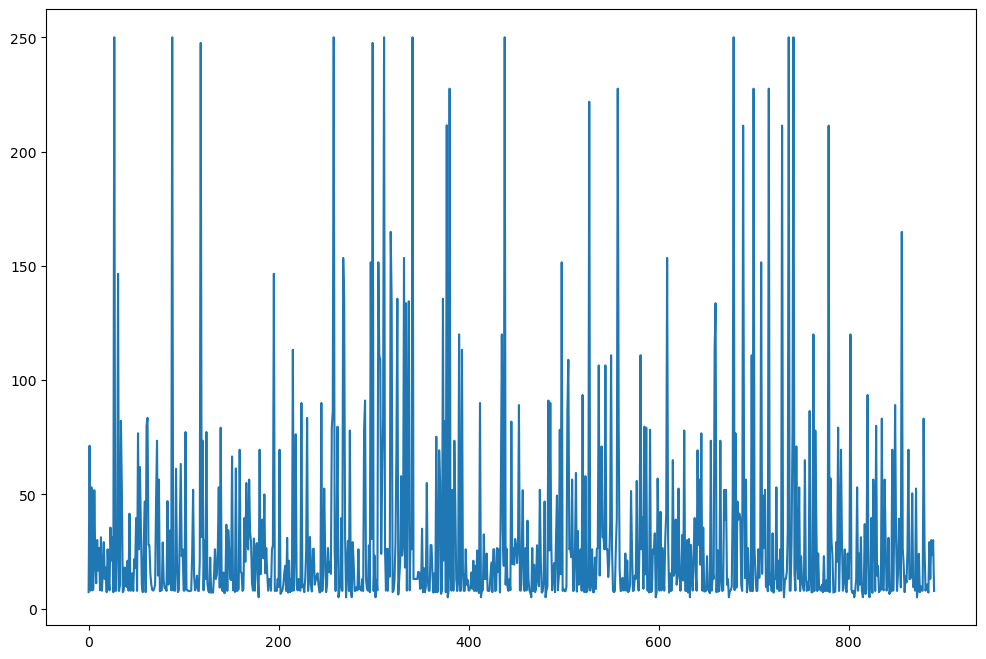

In [112]:
titanic.fare.plot(figsize = (12,8))
plt.show()

In [96]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [97]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,very cheap
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,moderate
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,moderate
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,exp
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,exp
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,exp


In [104]:
titanic.fare.sort_values(ascending= False)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: fare, Length: 891, dtype: float64

In [105]:
fare_cap = 250

In [108]:
titanic.loc[titanic.fare > fare_cap, "fare"] = fare_cap

In [109]:
fare_floor = 5

In [110]:
titanic.loc[titanic.fare < fare_floor, "fare"] = fare_floor

In [111]:
titanic.fare.describe()

count    891.000000
mean      31.320089
std       42.517981
min        5.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      250.000000
Name: fare, dtype: float64

# Scaling / Standardization

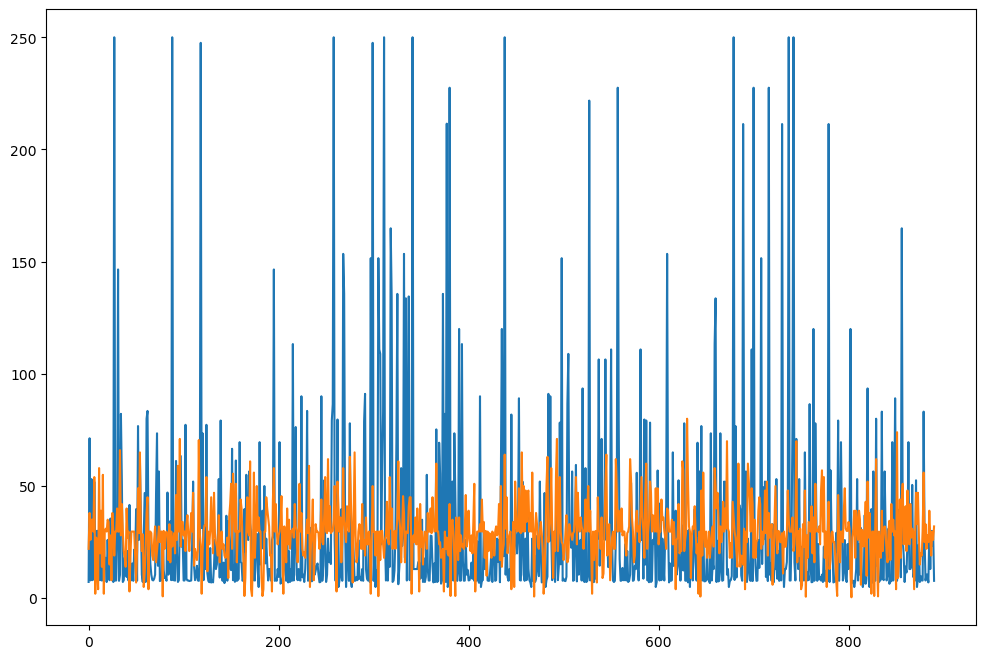

In [114]:
titanic.fare.plot(figsize = (12,8))
titanic.age.plot(figsize = (12,8))
plt.show()

In [115]:
mean_age = titanic.age.mean()
mean_fare = titanic.fare.mean()

In [126]:
std_age = titanic.age.std()
std_fare = titanic.fare.std()

In [127]:
titanic["age_z"] = round((titanic.age-mean_age) / std_age,2)
titanic["fare_z"] = round((titanic.fare - mean_fare) / std_fare,2)

In [128]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat,age_z,fare_z
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,very cheap,-0.59,-0.57
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,exp,0.64,0.94
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,moderate,-0.28,-0.55
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,exp,0.41,0.51
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,moderate,0.41,-0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,moderate,-0.21,-0.43
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,exp,-0.82,-0.03
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,exp,0.00,-0.19
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,exp,-0.28,-0.03


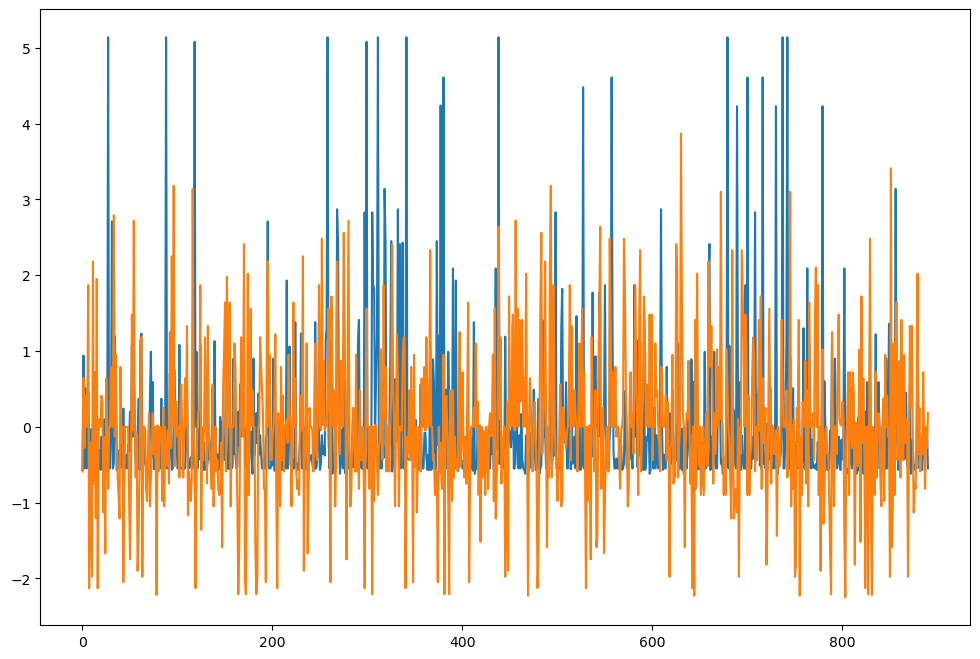

In [129]:
titanic.fare_z.plot(figsize = (12,8))
titanic.age_z.plot(figsize = (12,8))
plt.show()

In [130]:
round(titanic.describe(),2)

,survived,age,fare,no_relat,age_z,fare_z
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,29.70,31.32,0.90,0.00,0.00
std,0.49,13.00,42.52,1.61,1.00,1.00
min,0.00,0.42,5.00,0.00,-2.25,-0.62
25%,0.00,22.00,7.91,0.00,-0.59,-0.55
50%,0.00,29.70,14.45,0.00,0.00,-0.40
75%,1.00,35.00,31.00,1.00,0.41,-0.01
max,1.00,80.00,250.00,10.00,3.87,5.14


# Creating Dummy Variables

In [131]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat,age_z,fare_z
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,very cheap,-0.59,-0.57
1,1,First,female,38.0,71.2833,C,1,No,No,adult,exp,0.64,0.94
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,moderate,-0.28,-0.55
3,1,First,female,35.0,53.1000,S,1,No,No,adult,exp,0.41,0.51
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,moderate,0.41,-0.55


In [132]:
titanic.drop(columns= ["age", "alone", "child", "age_z", "fare_z", "fare_cat"], axis=1, inplace= True)

In [133]:
titanic.head()

,survived,pclass,sex,fare,embarked,no_relat,age_cat
0,0,Third,male,7.2500,S,1,young_adult
1,1,First,female,71.2833,C,1,adult
2,1,Third,female,7.9250,S,0,young_adult
3,1,First,female,53.1000,S,1,adult
4,0,Third,male,8.0500,S,0,adult


In [142]:
titanic_d = pd.get_dummies(titanic,columns= ["sex", "pclass", "embarked", "age_cat"], drop_first= True)

In [143]:
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survived             891 non-null    int64  
 1   fare                 891 non-null    float64
 2   no_relat             891 non-null    int64  
 3   sex_male             891 non-null    bool   
 4   pclass_Second        891 non-null    bool   
 5   pclass_Third         891 non-null    bool   
 6   embarked_Q           891 non-null    bool   
 7   embarked_S           891 non-null    bool   
 8   age_cat_teenager     891 non-null    bool   
 9   age_cat_young_adult  891 non-null    bool   
 10  age_cat_adult        891 non-null    bool   
 11  age_cat_elderly      891 non-null    bool   
dtypes: bool(9), float64(1), int64(2)
memory usage: 28.8 KB


# String Operations

In [144]:
import pandas as pd

In [145]:
summer = pd.read_csv("summer.csv")

In [148]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [147]:
summer.Athlete = summer.Athlete.str.title()

In [150]:
summer.Athlete.str.split(",", n = 1, expand= True)

,0,1
0,Hajos,Alfred
1,Herschmann,Otto
2,Drivas,Dimitrios
3,Malokinis,Ioannis
4,Chasapis,Spiridon
...,...,...
31160,Janikowski,Damian
31161,Rezaei,Ghasem Gholamreza
31162,Totrov,Rustam
31163,Aleksanyan,Artur


In [152]:
summer[["Surname", "First_Name"]] = summer.Athlete.str.split(",", n = 1, expand= True)

In [154]:
summer["Surname"] = summer.Surname.str.strip()
summer["First_Name"] = summer.First_Name.str.strip()

In [155]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon
...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"Janikowski, Damian",POL,Men,Wg 84 KG,Bronze,Janikowski,Damian
31161,2012,London,Wrestling,Wrestling Freestyle,"Rezaei, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,Rezaei,Ghasem Gholamreza
31162,2012,London,Wrestling,Wrestling Freestyle,"Totrov, Rustam",RUS,Men,Wg 96 KG,Silver,Totrov,Rustam
31163,2012,London,Wrestling,Wrestling Freestyle,"Aleksanyan, Artur",ARM,Men,Wg 96 KG,Bronze,Aleksanyan,Artur
